In [1]:
from scipy import signal
import numpy as np

In [2]:
from pylab import *
%matplotlib inline
rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

# Test in 2D

First create something to correlate

In [3]:
i,j = np.meshgrid(np.linspace(-1,1,32),np.linspace(-1,1,32))

r = np.sqrt(i**2 + j**2)

V = np.cos(r*2*pi)

In [4]:
V = np.random.randn(*i.shape)

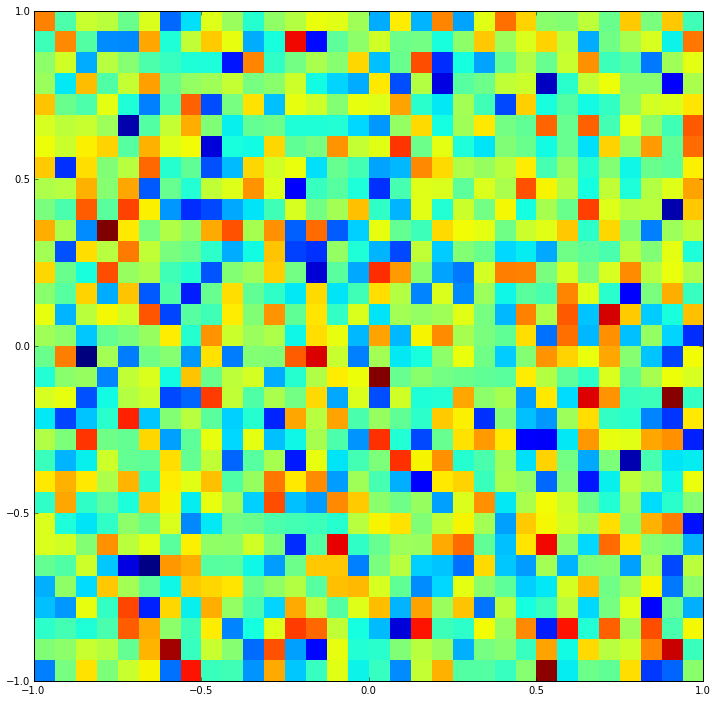

In [5]:
imshow(V, interpolation='nearest', extent=(-1,1,-1,1))
show()

Now look at the smaller correlation window

(16, 16)


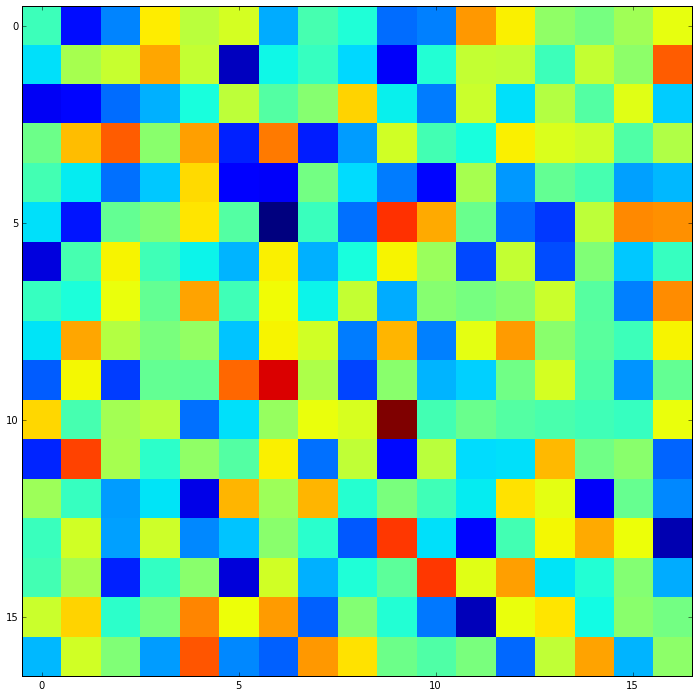

In [6]:
print V[8:-8,8:-8].shape
imshow(V[7:-8,7:-8], interpolation='nearest')
show()

## Actually do the correlation

In [7]:
C = signal.correlate(V,V[8:-8,8:-8],mode='valid')

And look at it

In [8]:
C.shape

(17, 17)

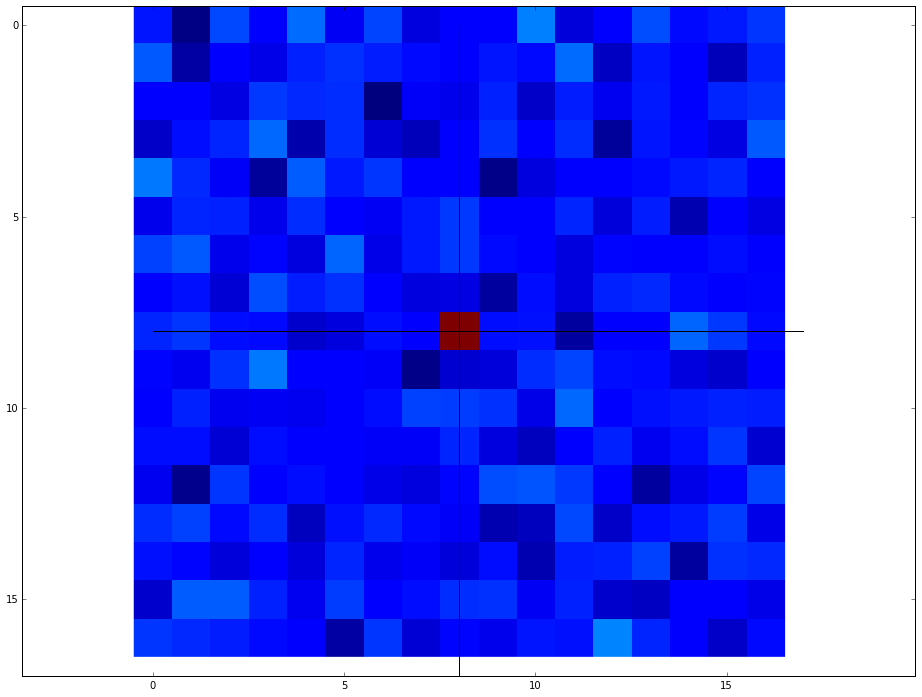

In [9]:
ctr = np.floor_divide(C.shape,2)
imshow(C, interpolation='nearest')
plot([0,C.shape[0]],[ctr[1],ctr[1]],'k-',[ctr[0],ctr[0]],[0,C.shape[1]],'k-')
ax = gca()
axis('equal')
ax.autoscale(tight=True)
show()

Check the maximum value.  Should be equal to the sum of the squared values in the smaller correlation region

In [10]:
np.sum(np.square(V[8:-8,8:-8]))

271.39046240214861

In [11]:
C[tuple(ctr)]

271.39046240214867

In [12]:
np.max(C)

271.39046240214867

## Check timing

In [13]:
%timeit C = signal.correlate(V,V[8:-8,8:-8],mode='same')

100 loops, best of 3: 3.82 ms per loop


In [14]:
%timeit C = signal.correlate(V,V[8:-8,8:-8],mode='valid')

1000 loops, best of 3: 1.08 ms per loop


# 3D correlation

Tile the 2D correlation along the z axis, taper off the intensity along z, and add some noise

In [26]:
V3 = np.tile(V[:,:,np.newaxis],(1,1,32))

i,j,k = np.meshgrid(np.linspace(-1,1,32),
                    np.linspace(-1,1,32),
                    np.linspace(-1,1,32))

V3 = V3 * np.cos(k)
V3 = V3 + np.random.standard_normal(V3.shape)*0.1

In [15]:
V3 = np.random.randn(5,5,5)

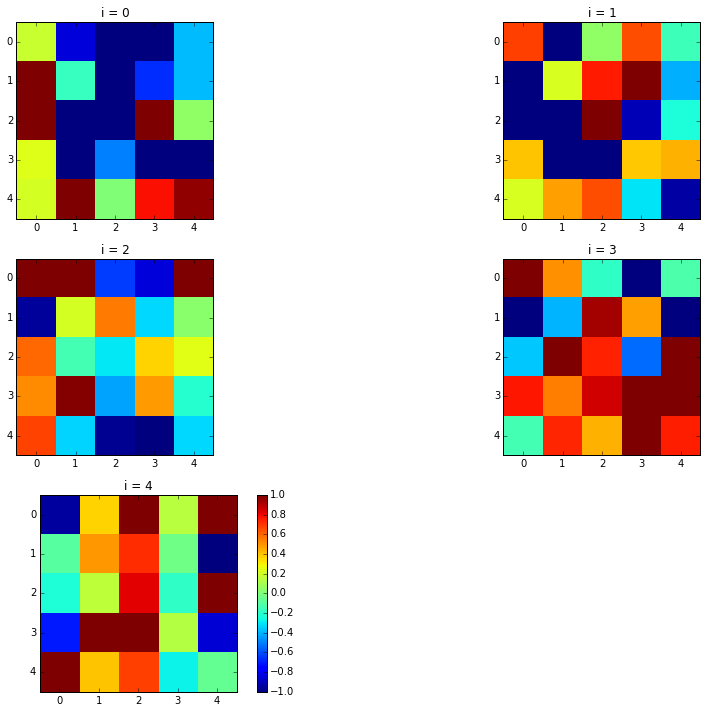

In [16]:
for i in arange(5):
    subplot(3,2,i+1)
    imshow(V3[:,:,i],vmin=-1,vmax=1,interpolation='nearest')
    title('i = {}'.format(i))

colorbar()
show()

In [20]:
V3[1:-1,1:-1,1:-1].shape

(3, 3, 3)

Key step: Have to reverse the larger matrix

In [34]:
C = signal.convolve(V3[::-1,::-1,::-1],V3[1:-1,1:-1,1:-1],mode='valid')

In [35]:
C.shape

(3, 3, 3)

In [36]:
ctr = np.floor_divide(C.shape,2)

In [37]:
C[tuple(ctr)]

30.099683841613384

In [38]:
np.sum(np.square(V3[1:-1,1:-1,1:-1]))

30.099683841613384

In [39]:
np.max(C)

30.099683841613384

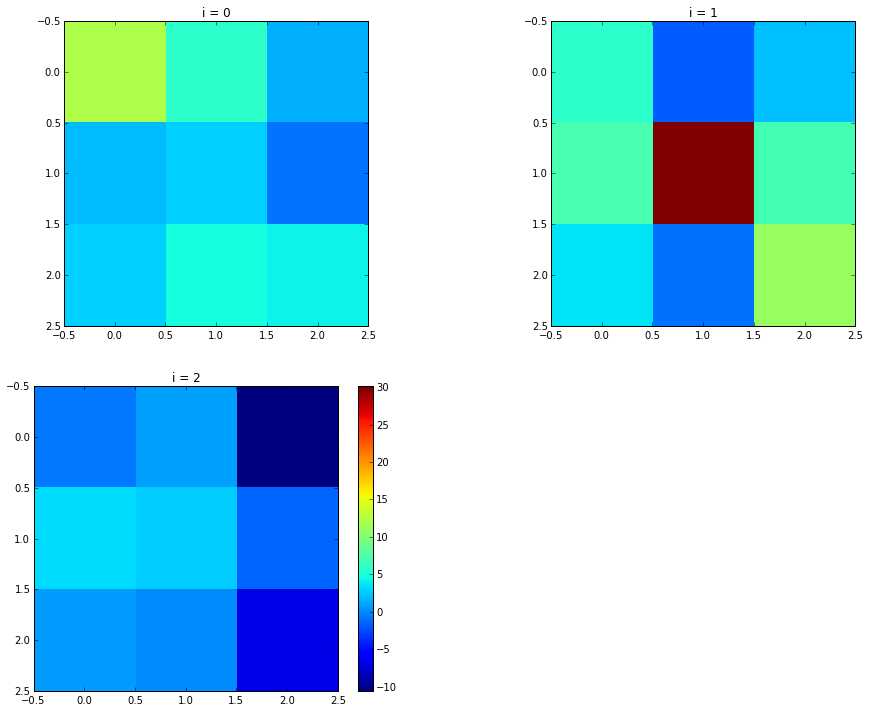

In [41]:
for i in arange(3):
    subplot(2,2,i+1)
    imshow(C[:,:,i],vmin=np.min(C),vmax=np.max(C),interpolation='nearest')
    title('i = {}'.format(i))

colorbar()
show()

In [84]:
%timeit C = signal.convolve(V3,V3[8:-8,8:-8,8:-8],mode='valid')

1 loops, best of 3: 334 ms per loop


In [85]:
%timeit C = signal.fftconvolve(V3,V3[8:-8,8:-8,8:-8],mode='valid')

100 loops, best of 3: 6.17 ms per loop


In [86]:
Cf = signal.fftconvolve(V3,V3[8:-8,8:-8,8:-8],mode='valid')

In [87]:
Cf[tuple(ctr)]

2162.5970092727371

In [88]:
np.sum(np.square(C - Cf))

1.4787714633477601e-20